In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA
import statistics



In [2]:
df = pd.read_csv('new_project_data.csv', thousands = ',')
df

,Date,Price,Open,High,Low,Vol.,Change %
0,Dec 20,40270.72,35048.15,40279.29,34145.13,-,14.92%
1,Nov 20,35042.14,30527.69,35814.18,30364.15,-,14.78%
2,Oct 20,30530.69,26831.76,30530.69,26830.59,-,13.76%
3,Sep 20,26837.42,25327.13,26862.21,25327.13,-,5.96%
4,Aug 20,25327.13,24710.93,25334.11,24690.75,-,2.57%
...,...,...,...,...,...,...,...
187,May 05,21482.08,21699.49,22003.71,21392.91,-,-3.25%
188,Apr 05,22204.05,20710.84,22463.80,20661.44,-,7.36%
189,Mar 05,20682.37,21659.66,21659.66,20682.37,-,-5.79%
190,Feb 05,21953.50,22639.72,23024.14,21953.50,-,-4.80%


In [3]:
df['Date']= pd.to_datetime(df['Date'], format= "%b %y")


In [4]:
df.set_index('Date', inplace = True) 
df


,Price,Open,High,Low,Vol.,Change %
Date,,,,,,
2020-12-01,40270.72,35048.15,40279.29,34145.13,-,14.92%
2020-11-01,35042.14,30527.69,35814.18,30364.15,-,14.78%
2020-10-01,30530.69,26831.76,30530.69,26830.59,-,13.76%
2020-09-01,26837.42,25327.13,26862.21,25327.13,-,5.96%
2020-08-01,25327.13,24710.93,25334.11,24690.75,-,2.57%
...,...,...,...,...,...,...
2005-05-01,21482.08,21699.49,22003.71,21392.91,-,-3.25%
2005-04-01,22204.05,20710.84,22463.80,20661.44,-,7.36%
2005-03-01,20682.37,21659.66,21659.66,20682.37,-,-5.79%


In [5]:
df.index


DatetimeIndex(['2020-12-01', '2020-11-01', '2020-10-01', '2020-09-01',
               '2020-08-01', '2020-07-01', '2020-06-01', '2020-05-01',
               '2020-04-01', '2020-03-01',
               ...
               '2005-10-01', '2005-09-01', '2005-08-01', '2005-07-01',
               '2005-06-01', '2005-05-01', '2005-04-01', '2005-03-01',
               '2005-02-01', '2005-01-01'],
              dtype='datetime64[ns]', name='Date', length=192, freq=None)

In [6]:
df = df.loc[:, "Price"]

In [7]:
df.head()

Date
2020-12-01    40270.72
2020-11-01    35042.14
2020-10-01    30530.69
2020-09-01    26837.42
2020-08-01    25327.13
Name: Price, dtype: float64

In [8]:
type(df)

pandas.core.series.Series

In [9]:
pd.to_numeric(df).astype('float64')

Date
2020-12-01    40270.72
2020-11-01    35042.14
2020-10-01    30530.69
2020-09-01    26837.42
2020-08-01    25327.13
                ...   
2005-05-01    21482.08
2005-04-01    22204.05
2005-03-01    20682.37
2005-02-01    21953.50
2005-01-01    23060.02
Name: Price, Length: 192, dtype: float64

<AxesSubplot:xlabel='Date'>

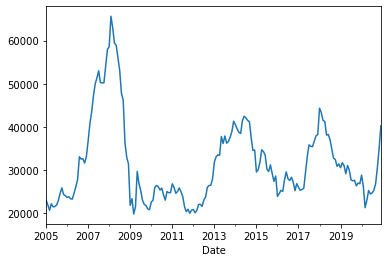

In [10]:
df.plot()

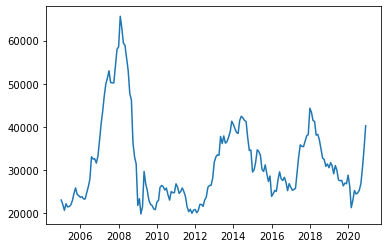

In [11]:
plt.plot(df)

<function matplotlib.pyplot.show(close=None, block=None)>

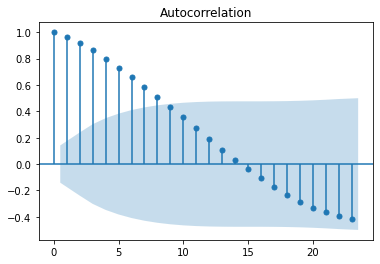

In [12]:
plot_acf(df)
plt.show

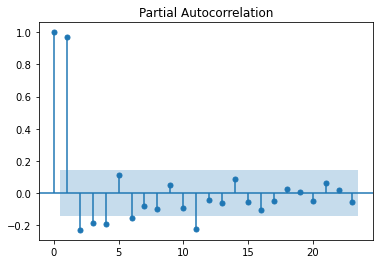

In [13]:
plot_pacf(df)
plt.show()

In [14]:
df.tail()

Date
2005-05-01    21482.08
2005-04-01    22204.05
2005-03-01    20682.37
2005-02-01    21953.50
2005-01-01    23060.02
Name: Price, dtype: float64

In [15]:
df.shape

(192,)

## checking for stationarity

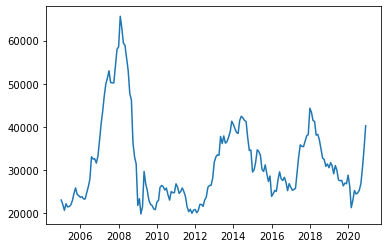

In [16]:
plt.plot(df)

## differencing the data since it's not stationary

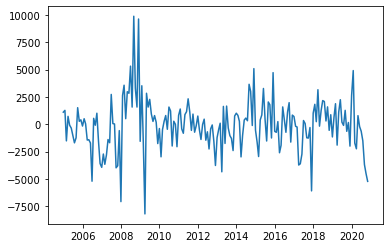

In [17]:
df_diff = df.diff().dropna()
plt.plot(df_diff)

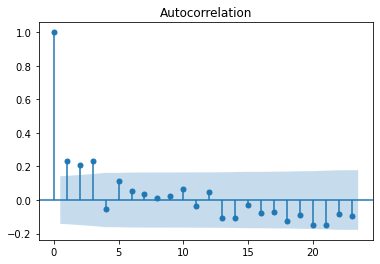

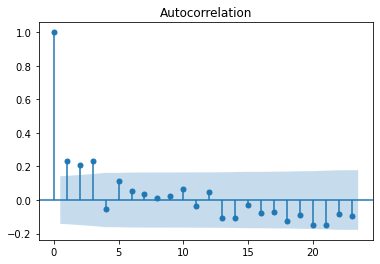

In [18]:
plot_acf(df_diff)

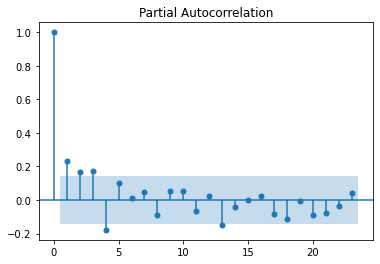

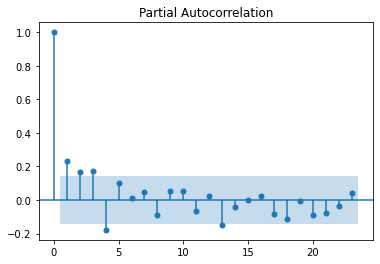

In [19]:
plot_pacf(df_diff)

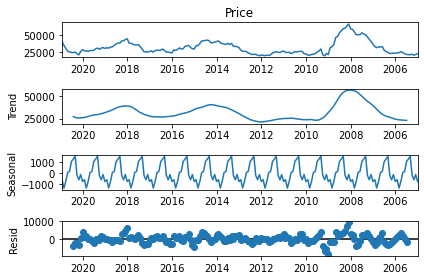

In [20]:
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(df, period=12)
decomposition.plot()
plt.show()

##  

## ARIMA

In [21]:
ARIMA_df = ARIMA(df, order = (1,1,1)).fit(transparams = False)

/home/tambarie/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/home/tambarie/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so infe

In [30]:
model = ARIMA(df, order = (1,1,0))
results = model.fit(transparams = False)
print(results.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.Price   No. Observations:                  191
Model:                 ARIMA(1, 1, 0)   Log Likelihood               -1747.975
Method:                       css-mle   S.D. of innovations  2452711911909.308
Date:                Mon, 07 Jun 2021   AIC                           3501.950
Time:                        16:52:12   BIC                           3511.707
Sample:                             1   HQIC                          3505.902
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const           -52.3632    214.473     -0.244      0.807    -472.723     367.997
ar.L1.D.Price     0.2310      0.071      3.248      0.001       0.092       0.370
                                    Root

/home/tambarie/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/home/tambarie/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so infe

In [ ]:
model=sm.tsa.statespace.SARIMAX(df,order=(1,1,1),seasonal_order=(1,1,1,12),trend='c',enforce_invertibility=False)
results=model.fit()
print(results.summary())

In [31]:
results.fittedvalues

Date
2020-11-01     -52.363214
2020-10-01   -1248.274117
2020-09-01   -1082.588709
2020-08-01    -893.556754
2020-07-01    -389.201992
                 ...     
2005-05-01    -120.255759
2005-04-01     -59.372212
2005-03-01     126.538399
2005-02-01    -391.833533
2005-01-01     253.416090
Length: 191, dtype: float64

In [29]:
df

Date
2020-12-01    40270.72
2020-11-01    35042.14
2020-10-01    30530.69
2020-09-01    26837.42
2020-08-01    25327.13
                ...   
2005-05-01    21482.08
2005-04-01    22204.05
2005-03-01    20682.37
2005-02-01    21953.50
2005-01-01    23060.02
Name: Price, Length: 192, dtype: float64

In [22]:
model = ARIMA(df, order = (3,1,3))
model_fit = model.fit(disp = 0)
print(model_fit.summary())

/home/tambarie/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency -1MS will be used.
  warnings.warn('No frequency information was'
/home/tambarie/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:585: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it is not'
/home/tambarie/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency -1MS will be used.
  warnings.warn('No frequency information was'
/home/tambarie/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:585: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but i

                             ARIMA Model Results                              
Dep. Variable:                D.Price   No. Observations:                  191
Model:                 ARIMA(3, 1, 3)   Log Likelihood               -1737.985
Method:                       css-mle   S.D. of innovations           2163.298
Date:                Mon, 07 Jun 2021   AIC                           3491.970
Time:                        16:45:47   BIC                           3517.989
Sample:                             1   HQIC                          3502.509
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const          -110.8123    263.801     -0.420      0.674    -627.853     406.228
ar.L1.D.Price    -0.4980      0.200     -2.490      0.013      -0.890      -0.106
ar.L2.D.Price    -0.0071      0.292     

/home/tambarie/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


In [23]:
model = ARIMA(df, order = (1,1,1))
model_fit = model.fit(disp = 0)
print(model_fit.summary())

/home/tambarie/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/home/tambarie/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so infe

                             ARIMA Model Results                              
Dep. Variable:                D.Price   No. Observations:                  191
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1744.367
Method:                       css-mle   S.D. of innovations           2238.365
Date:                Wed, 12 May 2021   AIC                           3496.735
Time:                        01:50:00   BIC                           3509.744
Sample:                             1   HQIC                          3502.004
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const          -124.3161    304.578     -0.408      0.683    -721.278     472.646
ar.L1.D.Price     0.7676      0.115      6.656      0.000       0.542       0.994
ma.L1.D.Price    -0.5595      0.144     

/home/tambarie/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


In [24]:
model = ARIMA(df, order = (1,1,0))
model_fit = model.fit(disp = 0)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.Price   No. Observations:                  191
Model:                 ARIMA(1, 1, 0)   Log Likelihood               -1747.952
Method:                       css-mle   S.D. of innovations           2281.280
Date:                Wed, 12 May 2021   AIC                           3501.904
Time:                        01:50:00   BIC                           3511.660
Sample:                             1   HQIC                          3505.856
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const           -96.7322    215.644     -0.449      0.654    -519.387     325.922
ar.L1.D.Price     0.2357      0.071      3.316      0.001       0.096       0.375
                                    Root

/home/tambarie/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/home/tambarie/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so infe

In [25]:
model = ARIMA(df, order = (0,1,1))
model_fit = model.fit(disp = 0)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.Price   No. Observations:                  191
Model:                 ARIMA(0, 1, 1)   Log Likelihood               -1749.199
Method:                       css-mle   S.D. of innovations           2296.344
Date:                Wed, 12 May 2021   AIC                           3504.397
Time:                        01:50:01   BIC                           3514.154
Sample:                             1   HQIC                          3508.349
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const           -94.6160    197.442     -0.479      0.632    -481.595     292.363
ma.L1.D.Price     0.1892      0.067      2.812      0.005       0.057       0.321
                                    Root

/home/tambarie/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/home/tambarie/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so infe

In [26]:
model = ARIMA(df, order = (2,1,0))
model_fit = model.fit(disp = 0)
print(model_fit.summary())

/home/tambarie/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/home/tambarie/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so infe

                             ARIMA Model Results                              
Dep. Variable:                D.Price   No. Observations:                  191
Model:                 ARIMA(2, 1, 0)   Log Likelihood               -1745.125
Method:                       css-mle   S.D. of innovations           2247.392
Date:                Wed, 12 May 2021   AIC                           3498.250
Time:                        01:50:02   BIC                           3511.259
Sample:                             1   HQIC                          3503.519
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const          -107.1965    257.774     -0.416      0.678    -612.424     398.031
ar.L1.D.Price     0.1986      0.072      2.771      0.006       0.058       0.339
ar.L2.D.Price     0.1732      0.072     

In [27]:
model = ARIMA(df, order = (1,1,2))
model_fit = model.fit(disp = 0)
print(model_fit.summary())

/home/tambarie/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/home/tambarie/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so infe

                             ARIMA Model Results                              
Dep. Variable:                D.Price   No. Observations:                  191
Model:                 ARIMA(1, 1, 2)   Log Likelihood               -1743.654
Method:                       css-mle   S.D. of innovations           2229.864
Date:                Wed, 12 May 2021   AIC                           3497.308
Time:                        01:50:03   BIC                           3513.570
Sample:                             1   HQIC                          3503.895
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const          -115.0317    282.017     -0.408      0.683    -667.775     437.711
ar.L1.D.Price     0.5927      0.221      2.679      0.007       0.159       1.026
ma.L1.D.Price    -0.4257      0.216     

/home/tambarie/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


In [28]:
model = ARIMA(df, order = (3,1,2))
model_fit = model.fit(disp = 0)
print(model_fit.summary())

/home/tambarie/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/home/tambarie/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so infe

                             ARIMA Model Results                              
Dep. Variable:                D.Price   No. Observations:                  191
Model:                 ARIMA(3, 1, 2)   Log Likelihood               -1738.203
Method:                       css-mle   S.D. of innovations           2165.843
Date:                Wed, 12 May 2021   AIC                           3490.407
Time:                        01:50:03   BIC                           3513.173
Sample:                             1   HQIC                          3499.628
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const          -117.8267    283.750     -0.415      0.678    -673.966     438.313
ar.L1.D.Price    -0.5373      0.206     -2.610      0.009      -0.941      -0.134
ar.L2.D.Price     0.1587      0.157     

/home/tambarie/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


In [29]:
model = ARIMA(df, order = (3,1,3))
model_fit = model.fit(disp = 0)
print(model_fit.summary())

/home/tambarie/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/home/tambarie/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so infe

                             ARIMA Model Results                              
Dep. Variable:                D.Price   No. Observations:                  191
Model:                 ARIMA(3, 1, 3)   Log Likelihood               -1737.985
Method:                       css-mle   S.D. of innovations           2163.298
Date:                Wed, 12 May 2021   AIC                           3491.970
Time:                        01:50:04   BIC                           3517.989
Sample:                             1   HQIC                          3502.509
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const          -110.8123    263.801     -0.420      0.674    -627.853     406.228
ar.L1.D.Price    -0.4980      0.200     -2.490      0.013      -0.890      -0.106
ar.L2.D.Price    -0.0071      0.292     

/home/tambarie/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


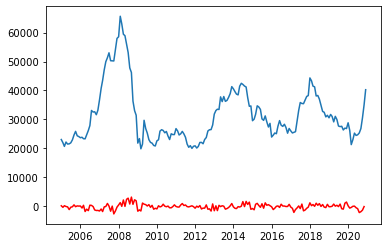

In [31]:
plt.plot(model_fit.fittedvalues, color='red')
plt.plot(df)

In [32]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [35]:
best_model = SARIMAX(data[df, "order"=(0, 1, 1), seasonal_order=(1, 1, 1, 12)).fit(dis=-1)
print(best_model.summary())

SyntaxError: invalid syntax (<ipython-input-35-99115861f72e>, line 1)

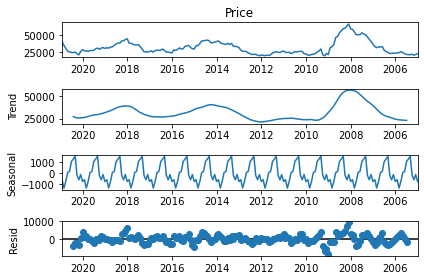

In [37]:
decomposition = sm.tsa.seasonal_decompose(df, model='additive')
fig = decomposition.plot()
plt.show()

In [65]:
model=sm.tsa.statespace.SARIMAX(df,order=(4,1,1),seasonal_order=(1,1,1,12),trend='c',enforce_invertibility=False, dropna = True)
results=model.fit()
print(results.summary())

/home/tambarie/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency -1MS will be used.
  warnings.warn('No frequency information was'
/home/tambarie/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:585: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it is not'
/home/tambarie/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency -1MS will be used.
  warnings.warn('No frequency information was'
/home/tambarie/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:585: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but i

                                     SARIMAX Results                                      
Dep. Variable:                              Price   No. Observations:                  192
Model:             SARIMAX(4, 1, 1)x(1, 1, 1, 12)   Log Likelihood               -1663.834
Date:                            Wed, 12 May 2021   AIC                           3345.669
Time:                                    03:43:14   BIC                           3374.355
Sample:                                         0   HQIC                          3357.301
                                            - 192                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -9.6812     75.633     -0.128      0.898    -157.920     138.557
ar.L1         -0.2052      1.266   

In [52]:
model.plot_diagnostics(figsize=(18, 8))
plt.show()

AttributeError: 'SARIMAX' object has no attribute 'plot_diagnostics'

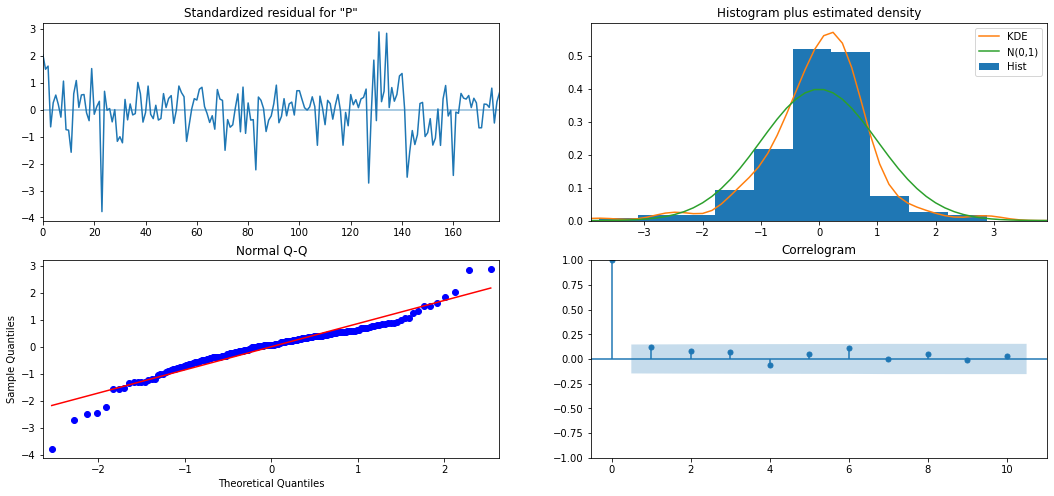

In [66]:
results.plot_diagnostics(figsize=(18, 8))
plt.show()

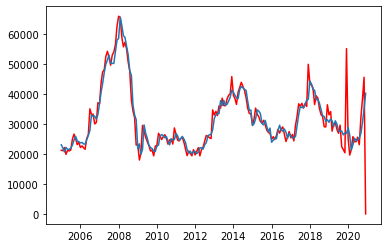

In [67]:
plt.plot(results.fittedvalues, color='red')
plt.plot(df)

In [68]:
results.resid

Date
2020-12-01    40284.432101
2020-11-01   -10549.544844
2020-10-01    -7802.314556
2020-09-01    -5321.416673
2020-08-01     2231.506784
                  ...     
2005-05-01      237.267097
2005-04-01     2335.385933
2005-03-01    -1470.454999
2005-02-01      845.964734
2005-01-01     1841.863130
Length: 192, dtype: float64

In [69]:
results.fittedvalues

Date
2020-12-01      -13.712101
2020-11-01    45591.684844
2020-10-01    38333.004556
2020-09-01    32158.836673
2020-08-01    23095.623216
                  ...     
2005-05-01    21244.812903
2005-04-01    19868.664067
2005-03-01    22152.824999
2005-02-01    21107.535266
2005-01-01    21218.156870
Length: 192, dtype: float64

In [70]:
df


Date
2020-12-01    40270.72
2020-11-01    35042.14
2020-10-01    30530.69
2020-09-01    26837.42
2020-08-01    25327.13
                ...   
2005-05-01    21482.08
2005-04-01    22204.05
2005-03-01    20682.37
2005-02-01    21953.50
2005-01-01    23060.02
Name: Price, Length: 192, dtype: float64

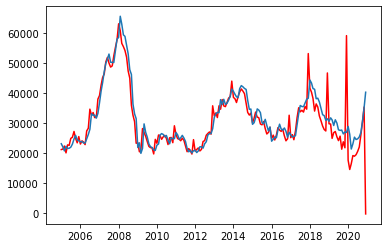

In [61]:
plt.plot(results.fittedvalues, color='red')
plt.plot(df)

In [2]:
pred = results.get_prediction(start = pd.to_datetime('2021-01-01'), dynamic = False)
pred_ci = pred.conf_int()

NameError: name 'results' is not defined

In [1]:
ax = y['1990':].plot(label= 'observed')
pred.predicted_mean.plot(ax = ax, label = 'One-step ahead Forecast', alpha = .7)
ax.fill_between(pred_ci.index,
               pred_ci.iloc[:,0],
               pred_ci.iloc[:,1], color = 'k', alpha = .2)
ax.set_xlabel('Date')
ax.set_ylabel('CO2 Levels')
plt.legend()
plt.show()


NameError: name 'y' is not defined